In this kernel, i join Santander - one of Kaggle Competition that use big file size dataset. The dataset size for training about 288 MB with 202 columns and for test about 287 MB with 201 columns. so i use tools dask for processing data in order to get more quickly.

### Import Library

In [3]:
#core package for data science
import numpy as np
import pandas as pd

#import package for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import machine learning library stuf and others
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

#hide warnings so you can't find any warning
import warnings 
warnings.simplefilter('ignore')

print("Done !!!")

Done !!!


### Load Dataset

#### Load dataset for training

In [4]:
%time train = pd.read_csv('data/train.csv')

Wall time: 8.54 s


In [5]:
%time train.head()

Wall time: 998 µs


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


Check column size and data types

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
train.ID_code.dtype

dtype('O')

In [8]:
train.target.dtype

dtype('int64')

We get info that this dataset contain 3 kind data type: 
- 1 columns(ID_code) have data type Object.
- 200 columns(var_0 till var_199) have data type float64.
- 1 columns(target) have data type int64.

So for next step before create machine learning model, we should drop ID_code and target columns.

In [9]:
%time train.describe()

Wall time: 2.54 s


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


From this table, briefly we get insight that are :
- Count of all dataset is 200k
- ID_code columns not display maybe because this columns have 'Object' data type
- Value of target columns only consist 0 and 1
- Most value of 200 columns(var_0 till var_199) have minus value. So we need normalize this value before process into machine learning model. 

Check missing value for dataset training

In [10]:
%time train.isnull().any()

Wall time: 462 ms


ID_code    False
target     False
var_0      False
var_1      False
var_2      False
var_3      False
var_4      False
var_5      False
var_6      False
var_7      False
var_8      False
var_9      False
var_10     False
var_11     False
var_12     False
var_13     False
var_14     False
var_15     False
var_16     False
var_17     False
var_18     False
var_19     False
var_20     False
var_21     False
var_22     False
var_23     False
var_24     False
var_25     False
var_26     False
var_27     False
           ...  
var_170    False
var_171    False
var_172    False
var_173    False
var_174    False
var_175    False
var_176    False
var_177    False
var_178    False
var_179    False
var_180    False
var_181    False
var_182    False
var_183    False
var_184    False
var_185    False
var_186    False
var_187    False
var_188    False
var_189    False
var_190    False
var_191    False
var_192    False
var_193    False
var_194    False
var_195    False
var_196    False
var_197    Fal

Looks like no missing value in training dataset so we continue to load testing dataset

#### Load dataset for testing

In [11]:
%time test = pd.read_csv('data/test.csv')

Wall time: 8.39 s


In [12]:
%time test.head()

Wall time: 998 µs


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


From this info, we have 1 'Object' data type that is ID_code columns and have 200 'float64' data type that are var_0 till var_199

In [14]:
%time test.describe()

Wall time: 2.41 s


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


### Drop non important features 

I drop ID_code and target columns from training dataset 

In [15]:
%time data_train = train.drop(['ID_code','target'],axis=1)

Wall time: 156 ms


In [16]:
%time data_train.head()

Wall time: 0 ns


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


I drop ID_code from testing dataset 

In [17]:
%time data_test = test.drop(['ID_code'],axis=1)

Wall time: 158 ms


In [18]:
%time data_test.head()

Wall time: 996 µs


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


### Normalize Data 

I use MinMax Scaler for normalize data because when use Standard Scaler, the result display negative numbers

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
%time train_mms = MinMaxScaler().fit_transform(data_train)

Wall time: 865 ms


In [21]:
train_mms

array([[0.42785307, 0.32482435, 0.56805853, ..., 0.43095798, 0.32765751,
        0.56064496],
       [0.55721218, 0.42863943, 0.6812351 , ..., 0.4682771 , 0.6095461 ,
        0.60582746],
       [0.41196889, 0.48377668, 0.57806091, ..., 0.38194973, 0.42583343,
        0.58273586],
       ...,
       [0.5432771 , 0.39305749, 0.4870996 , ..., 0.45612437, 0.38087342,
        0.63919915],
       [0.46750324, 0.25309006, 0.66682332, ..., 0.67445942, 0.46661746,
        0.37047369],
       [0.5258457 , 0.36714503, 0.580254  , ..., 0.36840624, 0.29469964,
        0.57890533]])

In [22]:
%time test_mms = MinMaxScaler().fit_transform(data_test)

Wall time: 596 ms


In [23]:
test_mms

array([[0.49139586, 0.93428577, 0.64786752, ..., 0.74520979, 0.44542557,
        0.45629049],
       [0.37686077, 0.66715926, 0.54707224, ..., 0.60623628, 0.62869843,
        0.27435234],
       [0.23917198, 0.19179647, 0.47591831, ..., 0.14611379, 0.66710099,
        0.24164405],
       ...,
       [0.51716536, 0.7090202 , 0.5411244 , ..., 0.49518522, 0.2609199 ,
        0.25505157],
       [0.60474278, 0.59479706, 0.6909511 , ..., 0.31743146, 0.10972517,
        0.58257973],
       [0.46432524, 0.68978447, 0.48123651, ..., 0.68261767, 0.38838552,
        0.47128785]])

Convert to dataframe

In [24]:
columns=list(data_train.columns.values)
columns

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

In [25]:
train_mms = pd.DataFrame(train_mms,columns=columns)
train_mms

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.427853,0.324824,0.568059,0.388041,0.550670,0.467321,0.454298,0.594255,0.270395,0.247420,...,0.569515,0.342943,0.568958,0.448173,0.510975,0.300318,0.678981,0.430958,0.327658,0.560645
1,0.557212,0.428639,0.681235,0.410417,0.628408,0.795072,0.536604,0.500584,0.660911,0.573056,...,0.668079,0.536531,0.523717,0.756190,0.350211,0.765154,0.686614,0.468277,0.609546,0.605827
2,0.411969,0.483777,0.578061,0.599690,0.474941,0.471329,0.753295,0.414724,0.270429,0.276041,...,0.522496,0.643141,0.448960,0.448000,0.671183,0.881350,0.236337,0.381950,0.425833,0.582736
3,0.535099,0.507140,0.396562,0.546993,0.647586,0.616822,0.572995,0.428577,0.224846,0.595326,...,0.570474,0.383085,0.370986,0.439205,0.745555,0.418549,0.346810,0.717176,0.590016,0.443232
4,0.473637,0.533434,0.624133,0.504796,0.621079,0.702836,0.589011,0.622220,0.811883,0.516413,...,0.387371,0.629275,0.299888,0.697737,0.238801,0.393218,0.557507,0.586526,0.591416,0.446041
5,0.555991,0.500594,0.608666,0.655146,0.507675,0.725165,0.358157,0.442026,0.682148,0.279731,...,0.239333,0.478880,0.745336,0.406573,0.324980,0.660003,0.325396,0.630220,0.317577,0.506174
6,0.572710,0.588516,0.419607,0.327460,0.522627,0.492687,0.630909,0.301109,0.296629,0.550508,...,0.703146,0.471131,0.601380,0.397839,0.501029,0.613128,0.716852,0.522153,0.231934,0.529194
7,0.660565,0.277547,0.682326,0.577443,0.308668,0.670363,0.547784,0.759844,0.753757,0.449381,...,0.837989,0.476129,0.638877,0.585045,0.751066,0.512214,0.566455,0.573380,0.119470,0.628526
8,0.788618,0.687878,0.685407,0.428839,0.321353,0.777401,0.344912,0.216439,0.354232,0.711996,...,0.477132,0.898728,0.446431,0.439096,0.319355,0.342672,0.403807,0.370360,0.667959,0.648787
9,0.607859,0.669456,0.393301,0.415089,0.735517,0.326748,0.609206,0.514334,0.514804,0.556775,...,0.450222,0.464118,0.397122,0.514612,0.319220,0.598674,0.871114,0.323305,0.502442,0.788440


In [26]:
test_mms = pd.DataFrame(test_mms,columns=columns)
test_mms

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.491396,0.934286,0.647868,0.717967,0.563676,0.563885,0.596918,0.555992,0.616146,0.675517,...,0.346499,0.745496,0.168422,0.477313,0.233148,0.780223,0.613081,0.745210,0.445426,0.456290
1,0.376861,0.667159,0.547072,0.395628,0.351853,0.527653,0.624899,0.572118,0.282491,0.255995,...,0.717218,0.587858,0.377335,0.741635,0.333622,0.569846,0.417179,0.606236,0.628698,0.274352
2,0.239172,0.191796,0.475918,0.537077,0.452813,0.834554,0.440118,0.643958,0.585037,0.606615,...,0.387344,0.700735,0.468998,0.467990,0.193832,0.744399,0.228884,0.146114,0.667101,0.241644
3,0.377177,0.561688,0.590920,0.501147,0.318535,0.687271,0.447462,0.657790,0.679433,0.475497,...,0.686848,0.600497,0.440591,0.516235,0.312664,0.854102,0.599396,0.501114,0.322375,0.523223
4,0.520319,0.610381,0.719749,0.590456,0.342955,0.426075,0.762902,0.216621,0.659735,0.429034,...,0.531726,0.605501,0.407583,0.509229,0.547880,0.489135,0.294091,0.183191,0.367939,0.449389
5,0.261919,0.522017,0.382092,0.538642,0.830318,0.424047,0.333596,0.400791,0.603165,0.449817,...,0.347779,0.498068,0.257009,0.698596,0.299542,0.285155,0.265224,0.596459,0.527638,0.746406
6,0.373789,0.365839,0.305956,0.629356,0.618420,0.456672,0.320501,0.326284,0.288235,0.306909,...,0.767850,0.484906,0.655567,0.697573,0.437285,0.522496,0.726220,0.488241,0.595839,0.662177
7,0.773211,0.516700,0.675088,0.639771,0.530035,0.830993,0.615041,0.537400,0.262426,0.476458,...,0.538742,0.357069,0.376453,0.444558,0.316833,0.329777,0.685614,0.706806,0.845884,0.596541
8,0.307070,0.650208,0.694478,0.364415,0.302671,0.311108,0.348696,0.392868,0.639314,0.440543,...,0.308473,0.537684,0.512141,0.391690,0.394915,0.532287,0.418933,0.614310,0.521314,0.536292
9,0.460472,0.331932,0.752728,0.692512,0.608508,0.376831,0.202823,0.645194,0.435481,0.369333,...,0.461464,0.704855,0.372963,0.557091,0.310245,0.583613,0.318082,0.558318,0.462585,0.724462


In [37]:
x_train = train_mms
y_train = train['target']
x_test = test_mms

x_train.shape, y_train.shape, x_test.shape

((200000, 200), (200000,), (200000, 200))

In [38]:
%time x_train.head()

Wall time: 0 ns


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.427853,0.324824,0.568059,0.388041,0.550670,0.467321,0.454298,0.594255,0.270395,0.247420,...,0.569515,0.342943,0.568958,0.448173,0.510975,0.300318,0.678981,0.430958,0.327658,0.560645
1,0.557212,0.428639,0.681235,0.410417,0.628408,0.795072,0.536604,0.500584,0.660911,0.573056,...,0.668079,0.536531,0.523717,0.756190,0.350211,0.765154,0.686614,0.468277,0.609546,0.605827
2,0.411969,0.483777,0.578061,0.599690,0.474941,0.471329,0.753295,0.414724,0.270429,0.276041,...,0.522496,0.643141,0.448960,0.448000,0.671183,0.881350,0.236337,0.381950,0.425833,0.582736
3,0.535099,0.507140,0.396562,0.546993,0.647586,0.616822,0.572995,0.428577,0.224846,0.595326,...,0.570474,0.383085,0.370986,0.439205,0.745555,0.418549,0.346810,0.717176,0.590016,0.443232
4,0.473637,0.533434,0.624133,0.504796,0.621079,0.702836,0.589011,0.622220,0.811883,0.516413,...,0.387371,0.629275,0.299888,0.697737,0.238801,0.393218,0.557507,0.586526,0.591416,0.446041


In [39]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [40]:
x_test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.491396,0.934286,0.647868,0.717967,0.563676,0.563885,0.596918,0.555992,0.616146,0.675517,...,0.346499,0.745496,0.168422,0.477313,0.233148,0.780223,0.613081,0.745210,0.445426,0.456290
1,0.376861,0.667159,0.547072,0.395628,0.351853,0.527653,0.624899,0.572118,0.282491,0.255995,...,0.717218,0.587858,0.377335,0.741635,0.333622,0.569846,0.417179,0.606236,0.628698,0.274352
2,0.239172,0.191796,0.475918,0.537077,0.452813,0.834554,0.440118,0.643958,0.585037,0.606615,...,0.387344,0.700735,0.468998,0.467990,0.193832,0.744399,0.228884,0.146114,0.667101,0.241644
3,0.377177,0.561688,0.590920,0.501147,0.318535,0.687271,0.447462,0.657790,0.679433,0.475497,...,0.686848,0.600497,0.440591,0.516235,0.312664,0.854102,0.599396,0.501114,0.322375,0.523223
4,0.520319,0.610381,0.719749,0.590456,0.342955,0.426075,0.762902,0.216621,0.659735,0.429034,...,0.531726,0.605501,0.407583,0.509229,0.547880,0.489135,0.294091,0.183191,0.367939,0.449389


### Machine Learning modeling

I choose Light GBM and XGBoost then compare which one is got high accuracy

#### Ligh GBM without hyperparameter

In [41]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [42]:
lgbm.fit(x_train, y_train)
y_predict = lgbm.predict(x_test)
accuracy = round(lgbm.score(x_train, y_train) * 100, 2)
accuracy

91.47

#### XGBoost without hyperparameter

In [43]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [44]:
xgb_classifier.fit(x_train, y_train)
y_predict_xgb = xgb_classifier.predict(x_test)
accuracy_xgb = round(xgb_classifier.score(x_train, y_train) * 100, 2)
accuracy_xgb

90.17

#### Use Random Search for hyperparameter

In [45]:
from sklearn.model_selection import RandomizedSearchCV

Search best hyperparameter for LGBM model

In [46]:
from scipy.stats import randint as sp_randint
dt_tuned_params = {   
                      "learning_rate": sp_randint(1, 4),
                      "n_estimators": sp_randint(10, 50),
                      "max_depth": sp_randint(1, 10)  }
n_iter_search = 50
random_search = RandomizedSearchCV(lgbm, param_distributions=dt_tuned_params,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(x_train, y_train)
print("Best Params : ",random_search.best_params_)
print()
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 48}

0.831 (+/-0.037) for {'learning_rate': 2, 'max_depth': 5, 'n_estimators': 31}
0.891 (+/-0.001) for {'learning_rate': 1, 'max_depth': 9, 'n_estimators': 37}
0.898 (+/-0.001) for {'learning_rate': 1, 'max_depth': 4, 'n_estimators': 37}
0.899 (+/-0.001) for {'learning_rate': 1, 'max_depth': 4, 'n_estimators': 43}
0.839 (+/-0.033) for {'learning_rate': 2, 'max_depth': 6, 'n_estimators': 22}
0.858 (+/-0.030) for {'learning_rate': 2, 'max_depth': 3, 'n_estimators': 22}
0.648 (+/-0.245) for {'learning_rate': 3, 'max_depth': 4, 'n_estimators': 21}
0.902 (+/-0.002) for {'learning_rate': 1, 'max_depth': 2, 'n_estimators': 26}
0.850 (+/-0.027) for {'learning_rate': 2, 'max_depth': 6, 'n_estimators': 20}
0.889 (+/-0.004) for {'learning_rate': 1, 'max_depth': 8, 'n_estimators': 42}
0.904 (+/-0.003) for {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 48}
0.650 (+/-0.581) for {'learning_rate': 3, 'max_depth': 7, 'n_estimato

#### Ligh GBM withhyperparameter

In [47]:
lgbm = LGBMClassifier(learning_rate=1,max_depth=3,n_estimators=48,num_leaves=31)
lgbm.fit(x_train, y_train)
y_predict = lgbm.predict(x_test)
accuracy = round(lgbm.score(x_train, y_train) * 100, 2)
accuracy

91.59

Search best hyperparameter for XGBoost model

In [50]:
#from scipy.stats import randint as sp_randint
#dt_tuned_params = {   
#                      "learning_rate": sp_randint(1, 4),
#                      "n_estimators": sp_randint(10, 50),
#                      "max_depth": sp_randint(1, 10)  }
#n_iter_search = 50
#random_search = RandomizedSearchCV(xgb_classifier, param_distributions=dt_tuned_params,
#                                   n_iter=n_iter_search, cv=5)

#random_search.fit(x_train, y_train)
#print("Best Params : ",random_search.best_params_)
#print()
#means = random_search.cv_results_['mean_test_score']
#stds = random_search.cv_results_['std_test_score']

#for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
#        print("%0.3f (+/-%0.03f) for %r"
#              % (mean, std * 2, params))*/

KeyboardInterrupt: 

### Choose machine learning model

I choose Ligth GBM accuracy for first submission in Titanic Prediction Competition

In [51]:
y_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
y_predict.shape

(200000,)

In [54]:
#Create csv file to upload to Kaggle
submission = pd.DataFrame({'ID_code': test['ID_code'], 'target': y_predict})
submission.head()

,ID_code,target
0,test_0,1
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [55]:
#Convert dataframe to csv file 
filename = 'data/Santander Prediction.csv'
submission.to_csv(filename, index = False)

My rangking in Kaggle at 24 march 2019 22.41 is 6343 with score 0.664
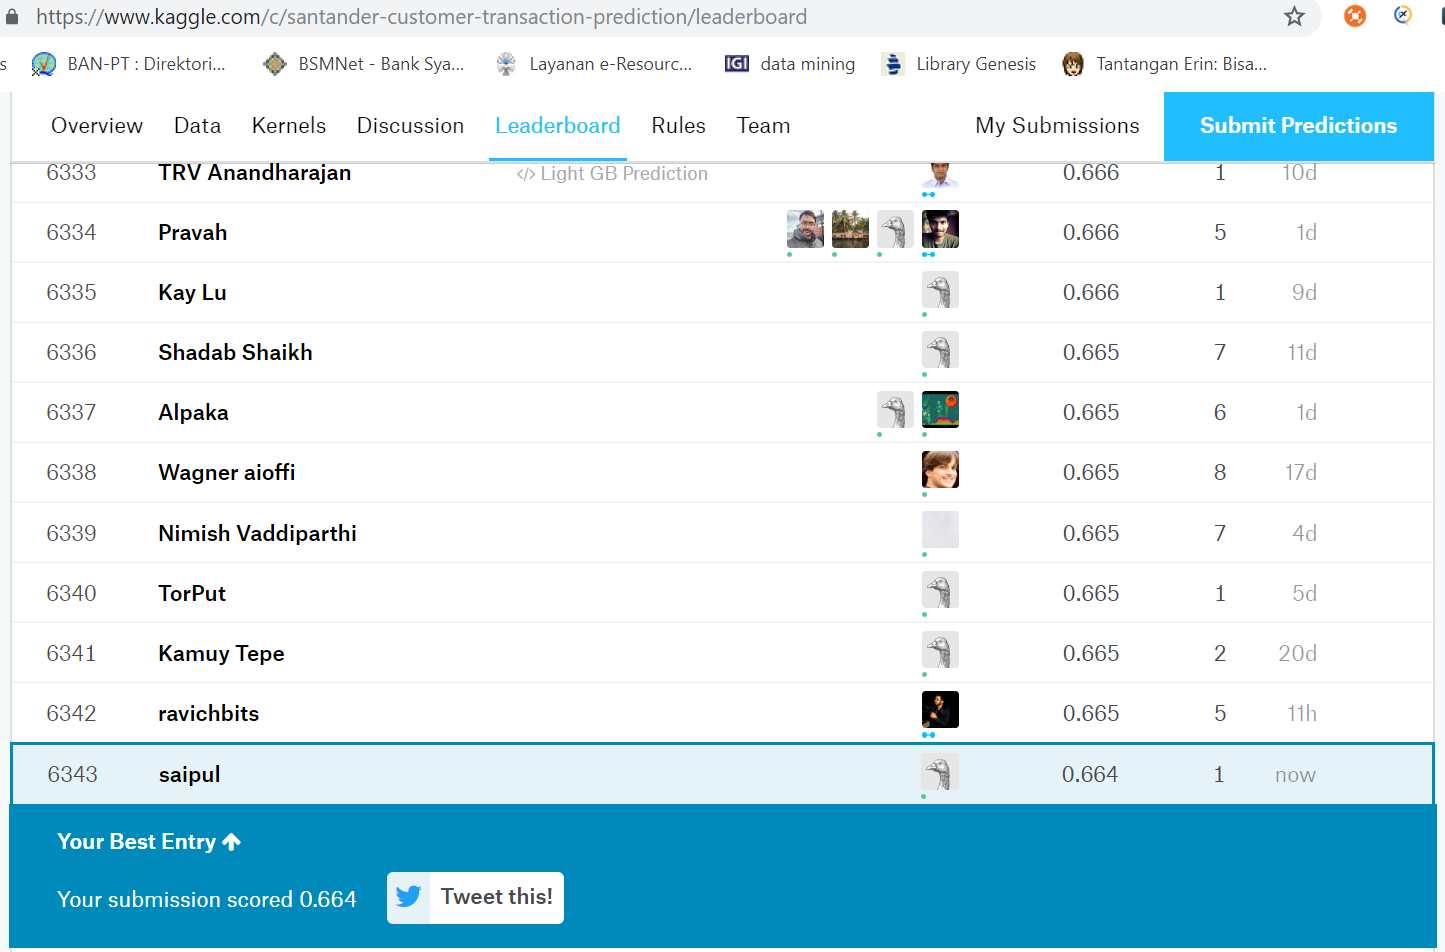

#### Save data to csv file after preprocessing

In [56]:
train_mms.to_csv('data/train_data_fix.csv',index=False)
test_mms.to_csv('data/test_data_fix.csv',index=False)